In [1]:
import numpy as np
import matplotlib.pyplot as plt

from valor_lite.object_detection import Detection, DataLoader, MetricType, BoundingBox

import matplotlib
%inline matplotlib

UsageError: Line magic function `%inline` not found.


In [23]:
# https://github.com/Lightning-AI/metrics/blob/107dbfd5fb158b7ae6d76281df44bd94c836bfce/tests/unittests/detection/test_map.py#L59

groundtruths = [
    {"boxes": [[214.1500, 41.2900, 562.4100, 285.0700]], "labels": ["4"]},
    {
        "boxes": [
            [13.00, 22.75, 548.98, 632.42],
            [1.66, 3.32, 270.26, 275.23],
        ],
        "labels": ["2", "2"],
    },
    {
        "boxes": [
            [61.87, 276.25, 358.29, 379.43],
            [2.75, 3.66, 162.15, 316.06],
            [295.55, 93.96, 313.97, 152.79],
            [326.94, 97.05, 340.49, 122.98],
            [356.62, 95.47, 372.33, 147.55],
            [462.08, 105.09, 493.74, 146.99],
            [277.11, 103.84, 292.44, 150.72],
        ],
        "labels": ["4", "1", "0", "0", "0", "0", "0"],
    },
    {
        "boxes": [
            [0, 10, 0, 10], # [72.92, 45.96, 91.23, 80.57],
            [50.17, 45.34, 71.28, 79.83],
            [0, 10, 0, 10], # [81.28, 47.04, 98.66, 78.50],
            [0, 10, 0, 10], # [63.96, 46.17, 84.35, 80.48],
            [0, 10, 0, 10], # [75.29, 23.01, 91.85, 50.85],
            [0, 10, 0, 10], # [56.39, 21.65, 75.66, 45.54],
            [0, 10, 0, 10], # [73.14, 1.10, 98.96, 28.33],
            [0, 10, 0, 10], # [62.34, 55.23, 78.14, 79.57],
            [44.17, 45.78, 63.99, 78.48],
            [0, 10, 0, 10], # [58.18, 44.80, 66.42, 56.25],
        ],
        "labels": [
            "49",
            "49",
            "49",
            "49",
            "49",
            "49",
            "49",
            "49",
            "49",
            "49",
        ],
    },
]
predictions = [
    {
        "boxes": [[258.15, 41.29, 606.41, 285.07]],
        "scores": [0.236],
        "labels": ["4"],
    },
    {
        "boxes": [
            [61.00, 22.75, 565.00, 632.42],
            [12.66, 3.32, 281.26, 275.23],
        ],
        "scores": [0.318, 0.726],
        "labels": ["3", "2"],
    },
    {
        "boxes": [            
            [87.87, 276.25, 384.29, 379.43],
            [0.00, 3.66, 142.15, 316.06],
            [296.55, 93.96, 314.97, 152.79],
            [328.94, 97.05, 342.49, 122.98],
            [356.62, 95.47, 372.33, 147.55],
            [464.08, 105.09, 495.74, 146.99],
            [276.11, 103.84, 291.44, 150.72],
        ],
        "scores": [0.546, 0.3, 0.407, 0.611, 0.335, 0.805, 0.953],
        "labels": ["4", "1", "0", "0", "0", "0", "0"],
    },
    {
        "boxes": [
            [0, 10, 0, 10], # [72.92, 45.96, 91.23, 80.57],
            [45.17, 45.34, 66.28, 79.83],
            [0, 10, 0, 10], # [82.28, 47.04, 99.66, 78.50],
            [0, 10, 0, 10], # [59.96, 46.17, 80.35, 80.48],
            [0, 10, 0, 10], # [75.29, 23.01, 91.85, 50.85],
            [0, 10, 0, 10], # [71.14, 1.10, 96.96, 28.33],
            [0, 10, 0, 10], # [61.34, 55.23, 77.14, 79.57],
            [41.17, 45.78, 60.99, 78.48],
            [0, 10, 0, 10], # [56.18, 44.80, 64.42, 56.25],
        ],
        "scores": [
            0.532,
            0.204,
            0.782,
            0.202,
            0.883,
            0.271,
            0.561,
            0.204,
            0.349,
        ],
        "labels": ["49", "49", "49", "49", "49", "49", "49", "49", "49"],
    },
]

detections = [
    Detection(
        uid=str(idx),
        groundtruths=[
            BoundingBox(
                uid=f"gt_{gidx}",
                xmin=box[0],
                ymin=box[1],
                xmax=box[2],
                ymax=box[3],
                labels=[label_value],
            )
            for gidx, (box, label_value) in enumerate(
                zip(gt["boxes"], gt["labels"])
            )
        ],
        predictions=[
            BoundingBox(
                uid=f"pd_{pidx}",
                xmin=box[0],
                ymin=box[1],
                xmax=box[2],
                ymax=box[3],
                labels=[label_value],
                scores=[score],
            )
            for pidx, (box, label_value, score) in enumerate(
                zip(pd["boxes"], pd["labels"], pd["scores"])
            )
        ],
    )
    for idx, (gt, pd) in enumerate(zip(groundtruths, predictions))
]

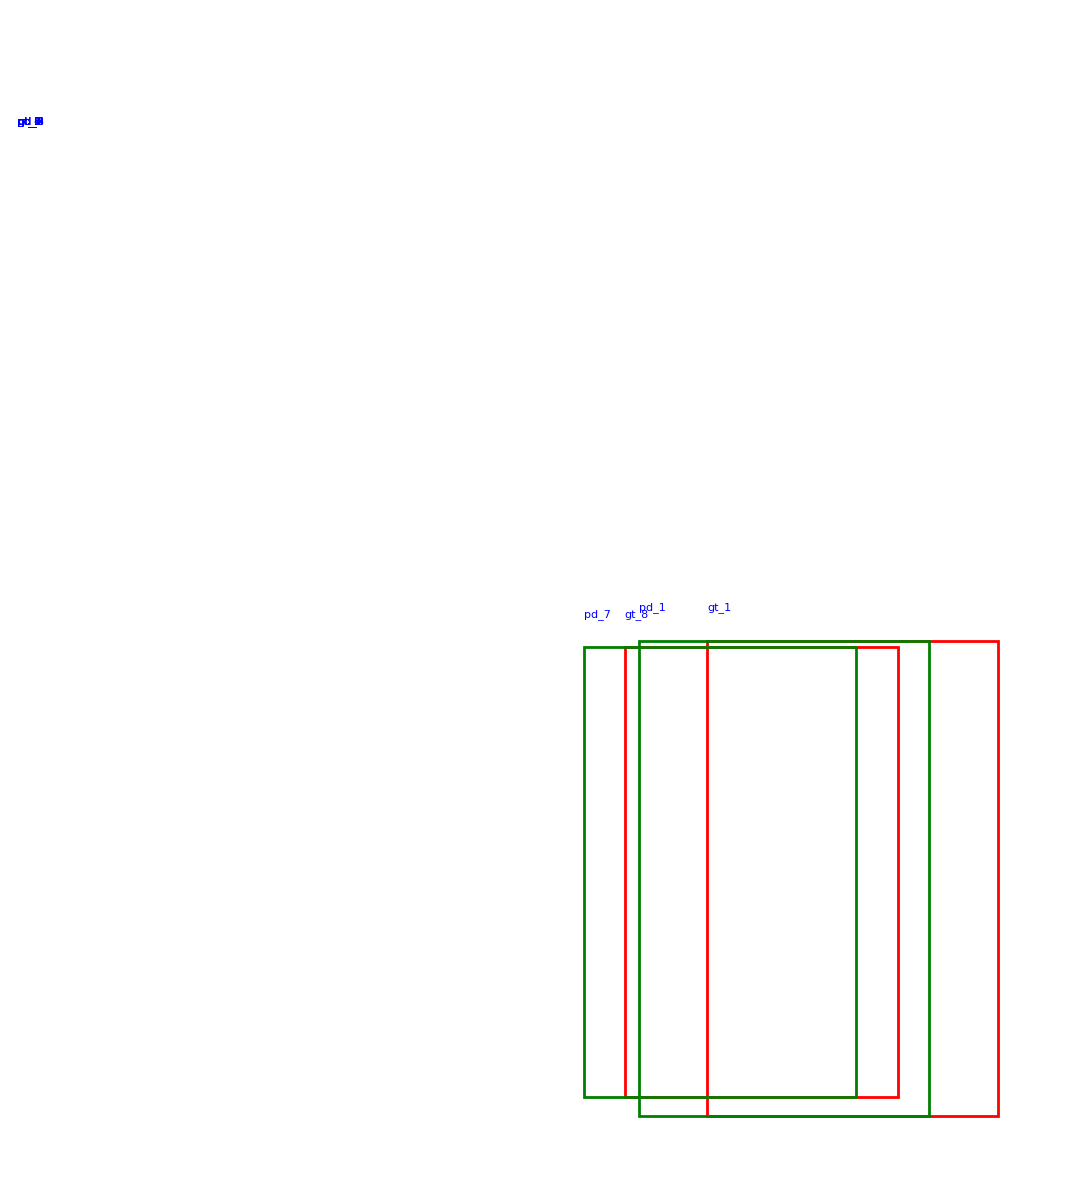

In [24]:
def plot(data, data2):
    boxes = np.array(data["boxes"])
    labels = np.array(data["labels"])

    # Determine canvas dimensions
    max_x = max(b[2] for b in boxes) + 5
    max_y = max(b[3] for b in boxes) + 5

    # Calculate canvas size
    max_x = int(np.ceil(boxes[:, 2].max())) + 5
    max_y = int(np.ceil(boxes[:, 3].max())) + 5

    # Create a blank white image
    canvas = np.ones((max_y, max_x, 3), dtype=np.uint8) * 255

    fig, ax = plt.subplots(figsize=(16, 12))
    ax.imshow(canvas)

    # Plot each bounding box with red edge and annotate
    for idx, ((x1, y1, x2, y2), label) in enumerate(zip(boxes, labels)):
        width = x2 - x1
        height = y2 - y1
        rect = matplotlib.patches.Rectangle(
            (x1, y1),
            width,
            height,
            linewidth=2,
            edgecolor='red',
            facecolor='none'
        )
        ax.add_patch(rect)
        ax.text(
            x1,
            y1 - 2,  # slightly above the top-left
            f"gt_{idx}",
            fontsize=8,
            color='blue',
            verticalalignment='bottom'
        )

    boxes = np.array(data2["boxes"])
    scores = np.array(data2["scores"])
    labels = np.array(data2["labels"])

    # Plot each bounding box with red edge and annotate
    for idx, ((x1, y1, x2, y2), score, label) in enumerate(zip(boxes, scores, labels)):
        width = x2 - x1
        height = y2 - y1
        rect = matplotlib.patches.Rectangle(
            (x1, y1),
            width,
            height,
            linewidth=2,
            edgecolor='green',
            facecolor='none'
        )
        ax.add_patch(rect)
        ax.text(
            x1,
            y1 - 2,  # slightly above the top-left
            f"pd_{idx}",
            fontsize=8,
            color='blue',
            verticalalignment='bottom'
        )

    ax.set_axis_off()
    plt.tight_layout()
    plt.show()

plot(groundtruths[-1], predictions[-1])